In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc= {'figure.figsize':(11,11)})

family = 'Malgun Gothic'
plt.rc('font' ,family=family)

In [3]:
apart_df = pd.read_csv('data/서울특별시/apartment_df_by_dong.csv')
day_care_center_df = pd.read_csv('data/서울특별시/day_care_center_df.csv', index_col=0)

In [4]:
apart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dong                    330 non-null    object 
 1   exclusive_use_area      330 non-null    float64
 2   transaction_real_price  330 non-null    float64
 3   real_price_per_m2       330 non-null    float64
dtypes: float64(3), object(1)
memory usage: 10.4+ KB


In [5]:
day_care_center_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5656 entries, 0 to 7444
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  5656 non-null   object 
 1   gu                    5656 non-null   object 
 2   day_care_name         5656 non-null   object 
 3   day_care_type         5656 non-null   object 
 4   day_care_baby_num     5656 non-null   int64  
 5   teacher_num           5431 non-null   float64
 6   nursing_room_num      2957 non-null   float64
 7   playground_num        2493 non-null   float64
 8   CCTV_num              3845 non-null   float64
 9   is_commuting_vehicle  5161 non-null   object 
 10  reference_date        5656 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 530.2+ KB


In [6]:
park_df = pd.read_csv('data/서울특별시/park_df.csv')
park_df

,Unnamed: 0,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,58,서울특별시,서초구,반포동,반 포,근린공원,26092.2,NaN,NaN,NaN,NaN,NaN,1981.0,2018-06-30
1,59,서울특별시,서초구,양재동,방아다리1,근린공원,2870.8,NaN,NaN,NaN,NaN,NaN,1988.0,2018-06-30
2,60,서울특별시,서초구,양재동,방아다리2,근린공원,2934.3,NaN,NaN,NaN,NaN,NaN,1988.0,2018-06-30
3,61,서울특별시,서초구,양재동,양재천,근린공원,19258.0,NaN,NaN,NaN,NaN,NaN,1988.0,2018-06-30
4,62,서울특별시,서초구,양재동,마 방,근린공원,6546.6,NaN,NaN,NaN,NaN,NaN,1983.0,2018-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,1354,서울특별시,구로구,천왕동,이펜시아어린이공원,어린이공원,1500.0,NaN,조합놀이 1기,NaN,NaN,NaN,2006.0,2019-02-25
926,1355,서울특별시,구로구,천왕동,개명소공원,소공원,5415.0,NaN,NaN,NaN,NaN,NaN,2006.0,2019-02-25
927,1356,서울특별시,구로구,천왕동,봉화대근린공원,근린공원,60975.0,NaN,NaN,NaN,NaN,NaN,2006.0,2019-02-25
928,1357,서울특별시,구로구,항동,푸른수목원,근린공원,100809.0,NaN,NaN,NaN,NaN,NaN,2005.0,2019-02-25


In [7]:
gu_dong_unique = park_df[['gu', 'dong']].drop_duplicates().reset_index(drop=True)
gu_dong_unique

,gu,dong
0,서초구,반포동
1,서초구,양재동
2,서초구,서초동
3,서초구,잠원동
4,서초구,우면동
...,...,...
161,구로구,오류동
162,구로구,온수동
163,구로구,궁동
164,구로구,천왕동


In [8]:
apart_df = pd.merge(gu_dong_unique, apart_df)

In [9]:
mean_data_for_gu = apart_df.groupby('gu').mean().reset_index()
mean_data_for_gu

C:\Users\rluvu\AppData\Local\Temp\ipykernel_17340\3301734812.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_data_for_gu = apart_df.groupby('gu').mean().reset_index()


,gu,exclusive_use_area,transaction_real_price,real_price_per_m2
0,강남구,86.351032,86603.132227,1003.835723
1,강동구,73.842046,48412.358322,691.283738
2,강북구,76.435856,31914.089942,423.560549
3,강서구,74.711849,38760.087538,521.775395
4,관악구,81.627065,57829.460033,695.453834
5,광진구,76.543600,44604.834154,608.731451
6,구로구,78.187852,34819.771713,449.781738
7,금천구,69.293613,27802.809221,448.316022
8,노원구,63.744796,29903.012910,464.407300
9,도봉구,66.782074,29804.561846,441.906827


In [10]:
corr_df = pd.merge(mean_data_for_gu, day_care_center_df).corr()
corr_df

C:\Users\rluvu\AppData\Local\Temp\ipykernel_17340\957790929.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = pd.merge(mean_data_for_gu, day_care_center_df).corr()


,exclusive_use_area,transaction_real_price,real_price_per_m2,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num
exclusive_use_area,1.000000,0.800724,0.675896,0.084718,0.091298,0.203032,0.152599,0.108026
transaction_real_price,0.800724,1.000000,0.973815,0.060583,0.064748,0.039040,0.223303,0.020560
real_price_per_m2,0.675896,0.973815,1.000000,0.055897,0.055866,-0.018507,0.183000,0.005257
day_care_baby_num,0.084718,0.060583,0.055897,1.000000,0.795779,0.802201,0.506571,0.776056
teacher_num,0.091298,0.064748,0.055866,0.795779,1.000000,0.614812,0.380416,0.631578
nursing_room_num,0.203032,0.039040,-0.018507,0.802201,0.614812,1.000000,0.394335,0.713640
playground_num,0.152599,0.223303,0.183000,0.506571,0.380416,0.394335,1.000000,0.435085
CCTV_num,0.108026,0.020560,0.005257,0.776056,0.631578,0.713640,0.435085,1.000000


C:\Users\rluvu\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\rluvu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


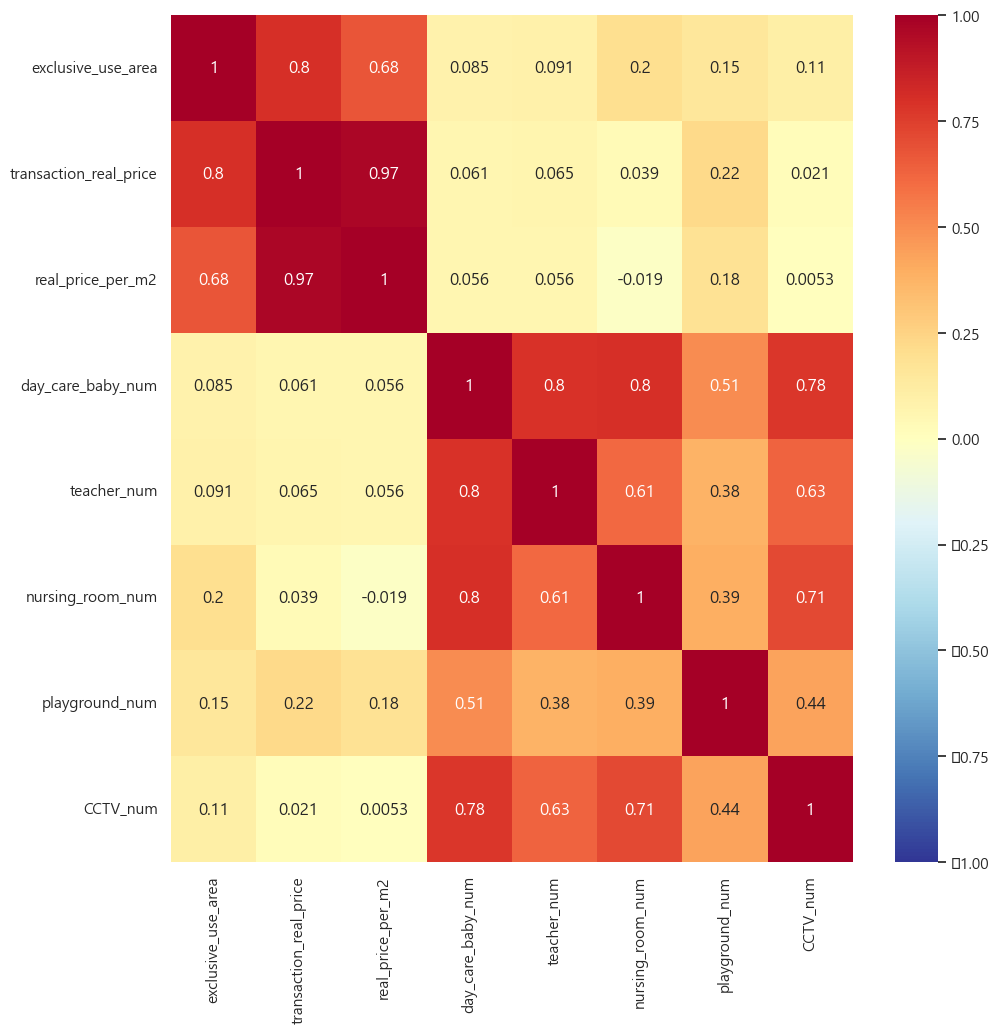

In [11]:
sns.heatmap(data=corr_df, annot=True, cmap="RdYlBu_r", vmin=-1, vmax=1)
plt.show()

In [12]:
apart_df = pd.read_csv('data/서울특별시/apartment_df.csv')
apart_df[['dong', 'exclusive_use_area', 'transaction_real_price']]

,dong,exclusive_use_area,transaction_real_price
0,신교동,84.82,37500
1,필운동,99.17,20000
2,필운동,84.74,38500
3,내수동,146.39,118000
4,내수동,194.43,120000
...,...,...,...
742280,강일동,59.72,53000
742281,강일동,59.87,53000
742282,강일동,84.74,56500
742283,강일동,84.74,55500


In [13]:
apart_df = apart_df[['dong', 'exclusive_use_area', 'transaction_real_price']]
apart_df['real_price_per_m2'] = apart_df['transaction_real_price'] / apart_df['exclusive_use_area']
apart_df

,dong,exclusive_use_area,transaction_real_price,real_price_per_m2
0,신교동,84.82,37500,442.112709
1,필운동,99.17,20000,201.673893
2,필운동,84.74,38500,454.330895
3,내수동,146.39,118000,806.065988
4,내수동,194.43,120000,617.188705
...,...,...,...,...
742280,강일동,59.72,53000,887.474883
742281,강일동,59.87,53000,885.251378
742282,강일동,84.74,56500,666.745339
742283,강일동,84.74,55500,654.944536


In [14]:
apart_df = pd.merge(apart_df, gu_dong_unique)
mean_data_for_gu = apart_df.groupby('gu').mean().reset_index()
mean_data_for_gu

C:\Users\rluvu\AppData\Local\Temp\ipykernel_17340\237663696.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_data_for_gu = apart_df.groupby('gu').mean().reset_index()


,gu,exclusive_use_area,transaction_real_price,real_price_per_m2
0,강남구,83.621196,91294.684645,1106.950585
1,강동구,75.143940,48966.691053,680.267379
2,강북구,75.891503,33692.467160,449.835857
3,강서구,72.751637,36881.131409,511.707947
4,관악구,79.405997,50608.137394,611.033893
5,광진구,84.130210,58045.828339,697.751200
6,구로구,73.069623,33604.522662,465.485934
7,금천구,72.529713,28286.295773,409.725093
8,노원구,62.781877,29017.869273,460.128329
9,도봉구,66.782074,29804.561846,441.906827


In [15]:
corr_df = pd.merge(mean_data_for_gu, day_care_center_df).corr()
corr_df

C:\Users\rluvu\AppData\Local\Temp\ipykernel_17340\957790929.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = pd.merge(mean_data_for_gu, day_care_center_df).corr()


,exclusive_use_area,transaction_real_price,real_price_per_m2,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num
exclusive_use_area,1.000000,0.809394,0.693227,0.117074,0.137842,0.169926,0.119127,0.167353
transaction_real_price,0.809394,1.000000,0.978996,0.074867,0.096094,0.056709,0.197043,0.047116
real_price_per_m2,0.693227,0.978996,1.000000,0.060253,0.075862,0.010462,0.200326,0.009144
day_care_baby_num,0.117074,0.074867,0.060253,1.000000,0.795779,0.802201,0.506571,0.776056
teacher_num,0.137842,0.096094,0.075862,0.795779,1.000000,0.614812,0.380416,0.631578
nursing_room_num,0.169926,0.056709,0.010462,0.802201,0.614812,1.000000,0.394335,0.713640
playground_num,0.119127,0.197043,0.200326,0.506571,0.380416,0.394335,1.000000,0.435085
CCTV_num,0.167353,0.047116,0.009144,0.776056,0.631578,0.713640,0.435085,1.000000


C:\Users\rluvu\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\rluvu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


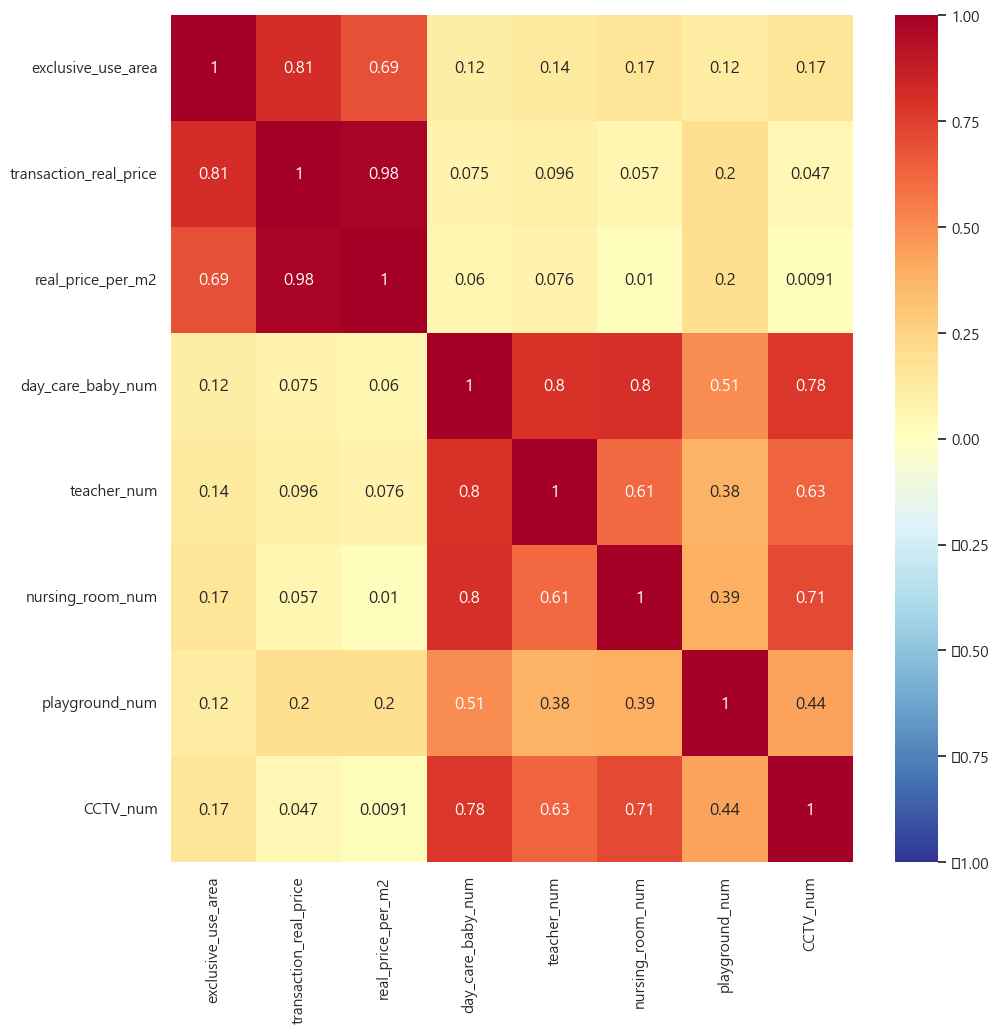

In [16]:
sns.heatmap(data=corr_df, annot=True, cmap="RdYlBu_r", vmin=-1, vmax=1)
plt.show()

In [17]:
day_care_center_df_groupby = day_care_center_df.groupby('gu').sum().reset_index()
day_care_center_df_groupby

C:\Users\rluvu\AppData\Local\Temp\ipykernel_17340\2738215850.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_care_center_df_groupby = day_care_center_df.groupby('gu').sum().reset_index()


,gu,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num
0,강남구,11605,0.0,0.0,0.0,0.0
1,강동구,13278,2690.0,0.0,0.0,1175.0
2,강북구,8569,1674.0,0.0,0.0,0.0
3,강서구,35150,7032.0,0.0,0.0,0.0
4,관악구,11543,2463.0,1207.0,196.0,1912.0
5,광진구,8778,1865.0,892.0,0.0,1133.0
6,구로구,13466,2797.0,1792.0,107.0,2206.0
7,금천구,8051,1663.0,772.0,33.0,1246.0
8,노원구,13711,3235.0,1576.0,107.0,2288.0
9,도봉구,10319,2089.0,1031.0,40.0,1317.0


In [18]:
def draw_heatmap_for_corr(corr_df):
    sns.heatmap(data=corr_df, annot=True, cmap="RdYlBu_r", vmin=-1, vmax=1)
    plt.show()

C:\Users\rluvu\AppData\Local\Temp\ipykernel_17340\4160059563.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  draw_heatmap_for_corr(pd.merge(mean_data_for_gu, day_care_center_df_groupby).corr())
C:\Users\rluvu\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\rluvu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


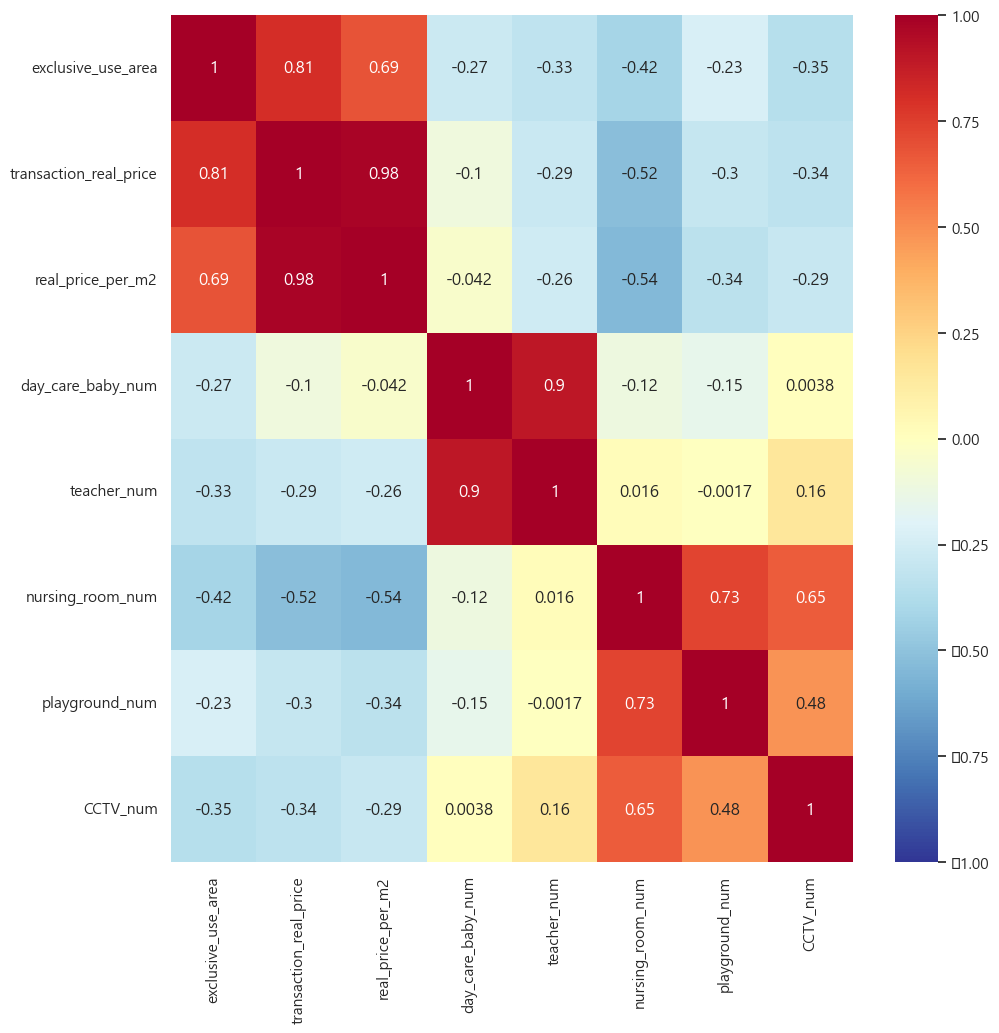

In [19]:
draw_heatmap_for_corr(pd.merge(mean_data_for_gu, day_care_center_df_groupby).corr())

C:\Users\rluvu\AppData\Local\Temp\ipykernel_17340\995701265.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  draw_heatmap_for_corr(pd.merge(mean_data_for_gu, day_care_center_df_groupby.replace(0, np.nan)).corr())
C:\Users\rluvu\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\rluvu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


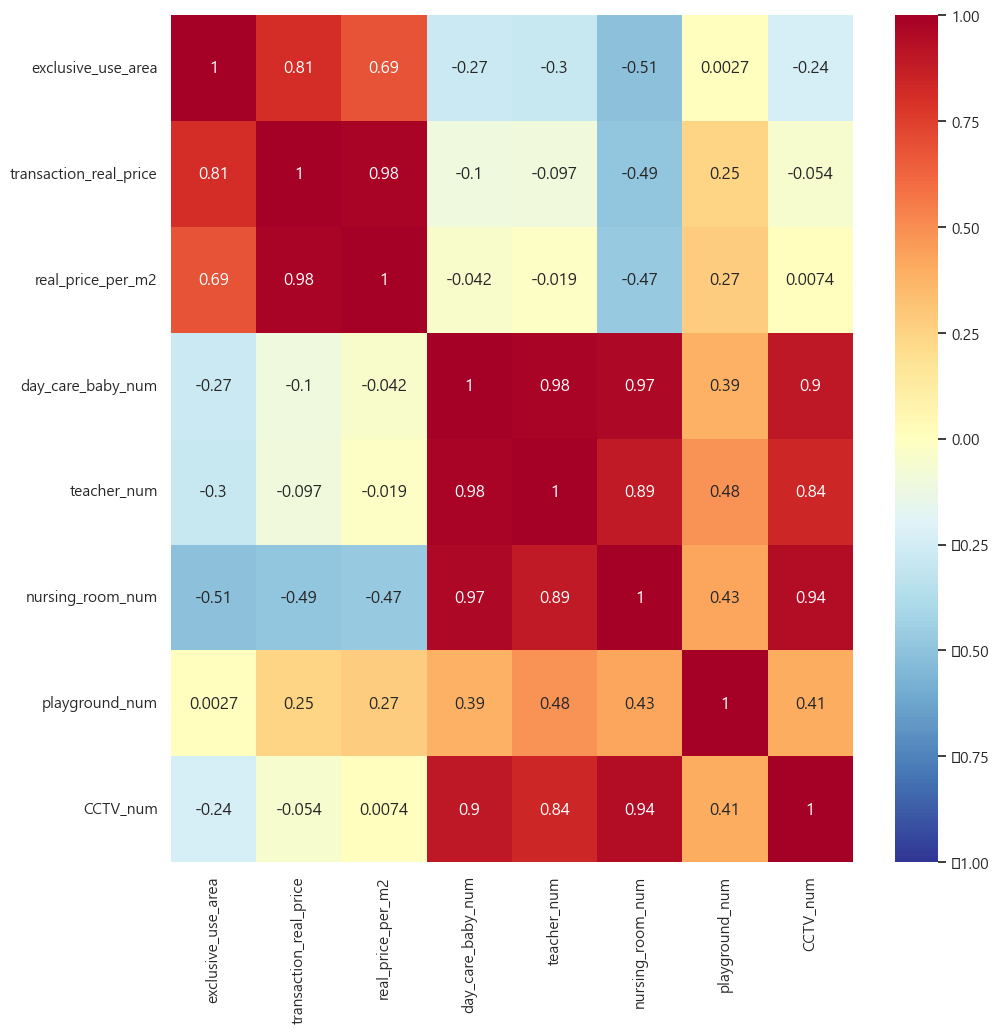

In [20]:
draw_heatmap_for_corr(pd.merge(mean_data_for_gu, day_care_center_df_groupby.replace(0, np.nan)).corr())

In [21]:
day_care_center_df_groupby.replace(0, np.nan)

,gu,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num
0,강남구,11605,NaN,NaN,NaN,NaN
1,강동구,13278,2690.0,NaN,NaN,1175.0
2,강북구,8569,1674.0,NaN,NaN,NaN
3,강서구,35150,7032.0,NaN,NaN,NaN
4,관악구,11543,2463.0,1207.0,196.0,1912.0
5,광진구,8778,1865.0,892.0,NaN,1133.0
6,구로구,13466,2797.0,1792.0,107.0,2206.0
7,금천구,8051,1663.0,772.0,33.0,1246.0
8,노원구,13711,3235.0,1576.0,107.0,2288.0
9,도봉구,10319,2089.0,1031.0,40.0,1317.0


In [22]:
from sklearn.impute import KNNImputer

model = KNNImputer(n_neighbors=10)
model

KNNImputer(n_neighbors=10)

In [23]:
numeric_columns = [column for column in day_care_center_df.columns if "num" in column]

In [26]:
numeric_df = day_care_center_df[numeric_columns]
numeric_df.reset_index(drop=True, inplace=True)
numeric_df

,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num
0,70,11.0,5.0,1.0,7.0
1,88,22.0,5.0,2.0,10.0
2,90,23.0,6.0,1.0,32.0
3,18,5.0,3.0,0.0,4.0
4,93,20.0,7.0,2.0,10.0
...,...,...,...,...,...
5651,20,NaN,NaN,NaN,NaN
5652,37,NaN,NaN,NaN,NaN
5653,19,NaN,NaN,NaN,NaN
5654,92,NaN,NaN,NaN,NaN


In [27]:
day_care_center_filled_data = model.fit_transform(numeric_df)
day_care_center_filled_df = pd.DataFrame(day_care_center_filled_data, columns=numeric_columns )
day_care_center_filled_df

,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num
0,70.0,11.0,5.0,1.0,7.0
1,88.0,22.0,5.0,2.0,10.0
2,90.0,23.0,6.0,1.0,32.0
3,18.0,5.0,3.0,0.0,4.0
4,93.0,20.0,7.0,2.0,10.0
...,...,...,...,...,...
5651,20.0,5.0,3.6,0.2,3.8
5652,37.0,8.4,4.0,0.1,4.2
5653,19.0,5.7,3.3,0.2,4.1
5654,92.0,14.9,7.0,0.8,10.5


In [31]:
day_care_center_df.reset_index(drop=True, inplace=True)
day_care_center_df

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70.0,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88.0,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90.0,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18.0,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93.0,20.0,7.0,2.0,10.0,N,2018-07-31
...,...,...,...,...,...,...,...,...,...,...,...
5651,서울특별시,강남구,현이어린이집,가정,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-05
5652,서울특별시,강남구,현지아한솔어린이집,민간,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-05
5653,서울특별시,강남구,호야 어린이집,가정,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-05
5654,서울특별시,강남구,힐스어린이집,국공립,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-05


In [32]:
day_care_center_df[numeric_columns] = day_care_center_filled_df
day_care_center_df

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70.0,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88.0,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90.0,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18.0,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93.0,20.0,7.0,2.0,10.0,N,2018-07-31
...,...,...,...,...,...,...,...,...,...,...,...
5651,서울특별시,강남구,현이어린이집,가정,20.0,5.0,3.6,0.2,3.8,NaN,2019-03-05
5652,서울특별시,강남구,현지아한솔어린이집,민간,37.0,8.4,4.0,0.1,4.2,NaN,2019-03-05
5653,서울특별시,강남구,호야 어린이집,가정,19.0,5.7,3.3,0.2,4.1,NaN,2019-03-05
5654,서울특별시,강남구,힐스어린이집,국공립,92.0,14.9,7.0,0.8,10.5,NaN,2019-03-05


C:\Users\rluvu\AppData\Local\Temp\ipykernel_17340\4234036479.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  draw_heatmap_for_corr(pd.merge(mean_data_for_gu, day_care_center_df).corr())
C:\Users\rluvu\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\rluvu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


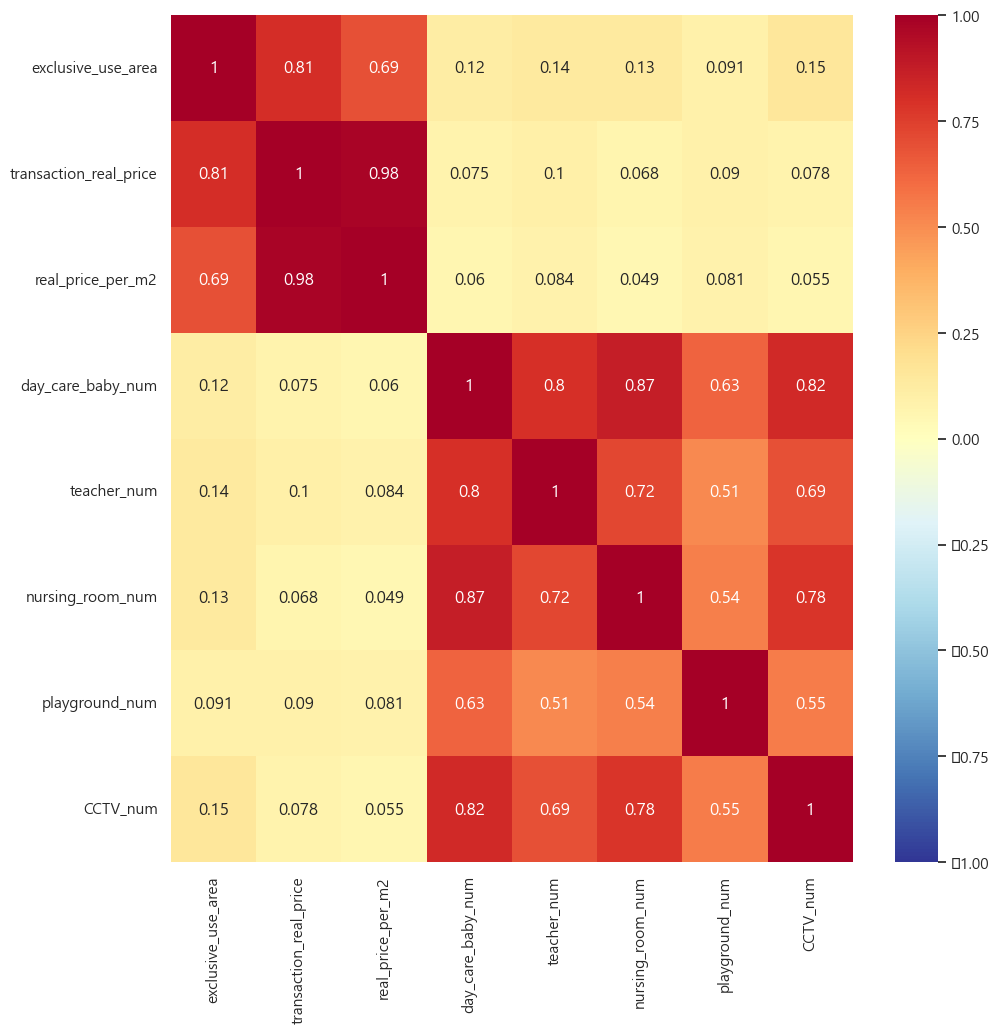

In [34]:
draw_heatmap_for_corr(pd.merge(mean_data_for_gu, day_care_center_df).corr())